# Model Building

In [64]:
#importing necessary libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn import metrics

import pickle

In [2]:
df = pd.read_csv('Absenteeism_preprocessed.csv')

In [3]:
df.head()

,reason_1,reason_2,reason_3,reason_4,month,Day_of_the_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [4]:
#deriving target column
#checking median to classify the targets
df['Absenteeism Time in Hours'].median()

3.0

In [5]:
target = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(),1,0)

In [6]:
target

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [7]:
df['Absenteeism'] = target

In [8]:
df.head()

,reason_1,reason_2,reason_3,reason_4,month,Day_of_the_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [9]:
target.sum() / target.shape[0]

0.45571428571428574

In [10]:
"""dropping the 'Daily Work Load Average', 'Distance to Work', 
   and 'month' columns by backward elimination process 
   (after checking the values of coefficients and odds_ratio) """

df = df.drop(['Absenteeism Time in Hours','Daily Work Load Average','Distance to Work','month'], axis = 1)

In [11]:
df.head()

,reason_1,reason_2,reason_3,reason_4,Day_of_the_week,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Absenteeism
0,0,0,0,1,1,289,33,30,0,2,1,1
1,0,0,0,0,1,118,50,31,0,1,0,0
2,0,0,0,1,2,179,38,31,0,0,0,0
3,1,0,0,0,3,279,39,24,0,2,0,1
4,0,0,0,1,3,289,33,30,0,2,1,0


### Creating a checkpoint

In [12]:
#Creating a checkpoint
df_target = df

In [13]:
df_target is df

True

In [14]:
#Creating input for model building
df_input = df_target.iloc[:,:-1]

### Standardizing the input dataframe

In [15]:
# create the Custom Scaler class such that dummies gets uneffected by standardization, else interpretability will be lost
class CustomScaler(BaseEstimator,TransformerMixin):
    
    def __init__(self,columns):   
        self.scaler = StandardScaler()
        self.columns = columns

    def fit(self, X, y=None):

        self.scaler.fit(X[self.columns], y)

        self.mean_ = np.mean(X[self.columns])

        self.var_ = np.var(X[self.columns])

        return self


    def transform(self, X, y=None):

        # record the initial order of the columns
        init_col_order = X.columns

        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)

        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]

        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)

        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [16]:
df_input.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Day_of_the_week',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [17]:
columns_to_scale = ['Day_of_the_week', 'Transportation Expense','Age', 'Body Mass Index', 'Children', 'Pets']

In [18]:
df_scaler = CustomScaler(columns_to_scale)

In [19]:
df_scaler.fit(df_input)

CustomScaler(columns=['Day_of_the_week', 'Transportation Expense', 'Age',
                      'Body Mass Index', 'Children', 'Pets'])

In [20]:
scaled_data = df_scaler.transform(df_input)

In [21]:
scaled_data

,reason_1,reason_2,reason_3,reason_4,Day_of_the_week,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,-0.800950,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,-0.800950,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,-0.232900,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.335149,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.335149,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.232900,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.232900,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,0.335149,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,0.335149,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


In [22]:
scaled_data.shape

(700, 11)

### Test train split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, target, test_size = 0.25, train_size = 0.75, random_state = 10)

In [24]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(525, 11) (175, 11) (525,) (175,)


## Building Model

In [25]:
#Logistic Regression model
lor = LogisticRegression()

In [26]:
lor.fit(x_train,y_train)

LogisticRegression()

In [27]:
lor.score(x_train,y_train)

0.7676190476190476

In [28]:
 #Random forest model
rfc= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rfc.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [29]:
rfc.score(x_train,y_train)

0.8819047619047619

In [30]:
#Support Vector classifier
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [31]:
svc.score(x_train,y_train)

0.7847619047619048

In [32]:
model_output_lor = lor.predict(x_train)

In [33]:
model_output_lor

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [34]:
y_train

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [35]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Manually checking the accuracy of a model

In [36]:
display(model_output_lor == y_train)

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [37]:
np.sum(model_output_lor == y_train)

403

In [38]:
model_output_lor.shape

(525,)

In [39]:
np.sum(model_output_lor == y_train) / model_output_lor.shape

array([0.76761905])

### Finding Intercept and coefficient for Logistic Regression

In [40]:
lor.intercept_

array([-1.7326156])

In [41]:
lor.coef_

array([[ 2.81124286,  0.8091391 ,  3.13104881,  0.97563082, -0.11056843,
         0.59450911, -0.30537088,  0.23208648,  0.12882994,  0.42278435,
        -0.36461119]])

In [42]:
df_input.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Day_of_the_week',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [43]:
df_input.head()

,reason_1,reason_2,reason_3,reason_4,Day_of_the_week,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,1,289,33,30,0,2,1
1,0,0,0,0,1,118,50,31,0,1,0
2,0,0,0,1,2,179,38,31,0,0,0
3,1,0,0,0,3,279,39,24,0,2,0
4,0,0,0,1,3,289,33,30,0,2,1


In [44]:
df_input.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Day_of_the_week',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [45]:
feature_name = df_input.columns.values

In [46]:
#creating a summary table to display intercept and coefficient for respective variables 
summary_table = pd.DataFrame(columns = ['Feature_name'], data = feature_name)

In [47]:
summary_table['Coefficient'] = np.transpose(lor.coef_)

In [48]:
summary_table

,Feature_name,Coefficient
0,reason_1,2.811243
1,reason_2,0.809139
2,reason_3,3.131049
3,reason_4,0.975631
4,Day_of_the_week,-0.110568
5,Transportation Expense,0.594509
6,Age,-0.305371
7,Body Mass Index,0.232086
8,Education,0.128830
9,Children,0.422784


In [49]:
#creating an empty index and fiiling the index with intercept value
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lor.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature_name,Coefficient
0,Intercept,-1.732616
1,reason_1,2.811243
2,reason_2,0.809139
3,reason_3,3.131049
4,reason_4,0.975631
5,Day_of_the_week,-0.110568
6,Transportation Expense,0.594509
7,Age,-0.305371
8,Body Mass Index,0.232086
9,Education,0.128830


### Interpreting the coefficients

In [50]:
#adding odds ratio into summary table
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table

,Feature_name,Coefficient,Odds_ratio
0,Intercept,-1.732616,0.176821
1,reason_1,2.811243,16.630575
2,reason_2,0.809139,2.245974
3,reason_3,3.131049,22.897982
4,reason_4,0.975631,2.652840
5,Day_of_the_week,-0.110568,0.895325
6,Transportation Expense,0.594509,1.812141
7,Age,-0.305371,0.736850
8,Body Mass Index,0.232086,1.261229
9,Education,0.128830,1.137497


In [51]:
#sorting values to determine the feature that dosent effect the model
#coefficient values close to 0 and odds_ratio close to 1 are features that dosent effect the models
summary_table.sort_values('Odds_ratio', ascending = False)

,Feature_name,Coefficient,Odds_ratio
3,reason_3,3.131049,22.897982
1,reason_1,2.811243,16.630575
4,reason_4,0.975631,2.652840
2,reason_2,0.809139,2.245974
6,Transportation Expense,0.594509,1.812141
10,Children,0.422784,1.526205
8,Body Mass Index,0.232086,1.261229
9,Education,0.128830,1.137497
5,Day_of_the_week,-0.110568,0.895325
7,Age,-0.305371,0.736850


## Testing the model

In [52]:
#accuracy for Logistic regression model
lor.score(x_test, y_test)

0.7371428571428571

In [53]:
#accuracy for random forest classifier model
rfc.score(x_test, y_test)

0.7657142857142857

In [54]:
#accuracy for support vector classifier model
svc.score(x_test, y_test)

0.7085714285714285

<AxesSubplot:>

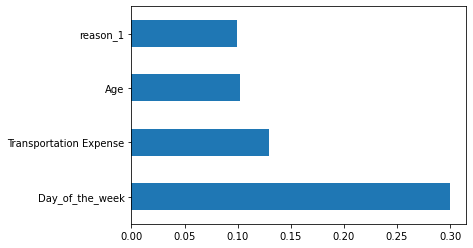

In [58]:
#feature importance
pd.Series(rfc.feature_importances_, index=x_train.columns).nlargest(4).plot(kind='barh')

In [59]:
#predicted probability for test cases
predicted_proba = lor.predict_proba(x_test)

In [60]:
predicted_proba

array([[0.79109005, 0.20890995],
       [0.75709165, 0.24290835],
       [0.36329827, 0.63670173],
       [0.37299741, 0.62700259],
       [0.61959118, 0.38040882],
       [0.69205853, 0.30794147],
       [0.77944186, 0.22055814],
       [0.37510283, 0.62489717],
       [0.73070174, 0.26929826],
       [0.31829459, 0.68170541],
       [0.76027019, 0.23972981],
       [0.69205853, 0.30794147],
       [0.2890023 , 0.7109977 ],
       [0.26388921, 0.73611079],
       [0.38199021, 0.61800979],
       [0.94553321, 0.05446679],
       [0.782412  , 0.217588  ],
       [0.3779476 , 0.6220524 ],
       [0.41161398, 0.58838602],
       [0.75469336, 0.24530664],
       [0.30493442, 0.69506558],
       [0.89376227, 0.10623773],
       [0.24472188, 0.75527812],
       [0.20623049, 0.79376951],
       [0.07497159, 0.92502841],
       [0.16921505, 0.83078495],
       [0.06873889, 0.93126111],
       [0.53811053, 0.46188947],
       [0.8503205 , 0.1496795 ],
       [0.34615049, 0.65384951],
       [0.

In [61]:
predicted_proba.shape

(175, 2)

In [63]:
#retriving ony relavant value (probability being 1)
predicted_proba[:,1]

array([0.20890995, 0.24290835, 0.63670173, 0.62700259, 0.38040882,
       0.30794147, 0.22055814, 0.62489717, 0.26929826, 0.68170541,
       0.23972981, 0.30794147, 0.7109977 , 0.73611079, 0.61800979,
       0.05446679, 0.217588  , 0.6220524 , 0.58838602, 0.24530664,
       0.69506558, 0.10623773, 0.75527812, 0.79376951, 0.92502841,
       0.83078495, 0.93126111, 0.46188947, 0.1496795 , 0.65384951,
       0.22055814, 0.24290835, 0.22055814, 0.12550122, 0.36572018,
       0.48927289, 0.75730536, 0.85726792, 0.217588  , 0.24290835,
       0.32148571, 0.63950013, 0.79407916, 0.64425505, 0.22055814,
       0.30794147, 0.88618732, 0.5027868 , 0.11235064, 0.24051784,
       0.26674832, 0.66792431, 0.44026513, 0.23154488, 0.11393535,
       0.65851623, 0.61843572, 0.13255815, 0.32321263, 0.22055814,
       0.60350852, 0.44242154, 0.32321263, 0.76222555, 0.12550122,
       0.95485359, 0.71880437, 0.94269818, 0.31216202, 0.31616407,
       0.28183502, 0.2524669 , 0.62081893, 0.3607679 , 0.65588

In [67]:
""" Out of 3 models i.e., logistic regression, random forest classifier and support vector classifier,
    logistic regression model performed better when compared with both train and test results """

' Out of 3 models i.e., logistic regression, random forest classifier and support vector classifier,\n    logistic regression model performed better when compared with both train and test results '

In [65]:
#Pickle the model file
with open('Abseentism_model','wb') as file:
    pickle.dump(lor, file)

In [66]:
#Pickle the scaler file
with open('scaler','wb') as file:
    pickle.dump(df_scaler, file)